In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('./datasets/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
1,2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2,2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
3,2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
4,2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [5]:
# Set Date to be in the index
df.set_index('Date', inplace=True)

In [8]:
# Sort the index
df.sort_index(inplace=True)

df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,432.799988,446.549988,431.570007,435.750000,434.965759,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200
2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300


## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

In [9]:
df.loc['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


You can also filter by month:

In [11]:
#This will filter by month and give me all entries from the month i specify
df.loc['2019-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300
2019-01-09,151.289993,154.529999,149.630005,153.309998,150.005737,45099100
2019-01-10,152.500000,153.970001,150.860001,153.800003,150.485199,35780700
2019-01-11,152.880005,153.699997,151.509995,152.289993,149.007721,27023200
2019-01-14,150.850006,151.270004,149.220001,150.000000,146.767090,32439200


## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [13]:
#This will give me the mean of each year in the dataframe
df.resample('Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,203.428600,205.660200,200.742900,203.097601,198.222399,3.814488e+07
2019-12-31,207.869087,209.831707,206.271627,208.255952,205.598130,2.803096e+07
2020-12-31,317.354277,322.428881,313.472763,318.356973,317.216868,4.205700e+07


In [14]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-31,214.618889,216.515555,213.503333,215.216668,209.767180,2.697328e+07
2018-09-30,222.331053,224.530526,220.077895,222.073685,216.531868,3.573537e+07
2018-10-31,221.200001,223.940871,217.874347,220.845652,215.334475,3.433689e+07
2018-11-30,191.819523,193.949523,188.700475,191.235714,186.944749,4.577745e+07
2018-12-31,165.243158,167.320001,161.891054,164.266317,160.725920,4.731171e+07
2019-01-31,153.608571,155.530478,151.947619,154.166190,150.843483,3.943273e+07
2019-02-28,171.392108,172.881580,170.531579,171.727893,168.558006,2.487056e+07
2019-03-31,183.223810,184.931906,181.410952,183.293810,180.112481,3.099911e+07
2019-04-30,199.866665,201.577143,198.630951,200.516191,197.035945,2.410084e+07


In [15]:
# This will give me the mean of each quarter in thee DF
df.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-30,218.579189,220.631351,216.879460,218.737839,213.240939,3.147273e+07
2018-12-31,194.530635,196.867620,191.265873,193.912064,189.401986,4.206345e+07
2019-03-31,169.343116,171.056722,167.879180,169.663770,166.437333,3.199360e+07
2019-06-30,194.462538,196.558254,192.990794,194.892699,191.907756,2.794860e+07
2019-09-30,209.085312,211.013750,207.306093,209.120781,206.731329,2.652498e+07
2019-12-31,256.569998,258.673125,254.903282,257.328749,255.266529,2.584114e+07
2020-03-31,293.131775,298.772418,289.030323,294.163709,292.544111,4.932570e+07
2020-06-30,308.978730,313.365556,305.579841,309.961269,309.095251,3.696004e+07
2020-09-30,392.519259,397.898888,388.016667,393.501851,392.823267,3.725882e+07


In [16]:
# Summary stats for the close broken out by quarter
df.resample('Q')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2018-09-30,37.0,218.737839,5.870672,207.250000,215.460007,218.369995,223.100006,228.360001
2018-12-31,63.0,193.912064,25.365219,146.830002,171.619995,193.529999,218.110001,232.070007
2019-03-31,61.0,169.663770,13.289959,142.190002,156.300003,171.059998,175.850006,195.089996
2019-06-30,63.0,194.892699,9.440303,173.300003,189.540001,197.179993,200.644996,211.750000
2019-09-30,64.0,209.120781,7.442872,193.339996,203.337505,208.084999,213.502499,223.970001
2019-12-31,64.0,257.328749,19.332341,218.960007,242.512494,261.869995,268.000000,293.649994
2020-03-31,62.0,294.163709,29.213213,224.369995,273.997490,302.964996,318.625008,327.200012
2020-06-30,63.0,309.961269,33.301355,240.910004,283.800003,313.140015,334.679993,366.529999
2020-09-30,27.0,393.501851,26.744464,364.109985,376.544998,384.760010,392.164994,455.609985


## Lookup challenge
---

Where can you find all the resample options?

In [17]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [18]:
df.rolling(3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-10,207.646668,208.896668,206.130000,207.886668,202.226206,2.354310e+07
2018-08-13,208.733333,209.943334,207.189997,208.426666,202.988124,2.466490e+07
2018-08-14,208.943334,210.203334,207.543330,208.716665,203.508158,2.375003e+07
...,...,...,...,...,...,...
2020-08-03,407.029999,419.133331,403.313334,415.183340,414.436106,7.005150e+07
2020-08-04,426.956665,438.456665,422.806661,433.150004,432.370432,7.129663e+07
2020-08-05,435.613332,443.760000,433.569997,438.220001,437.431305,5.026790e+07


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

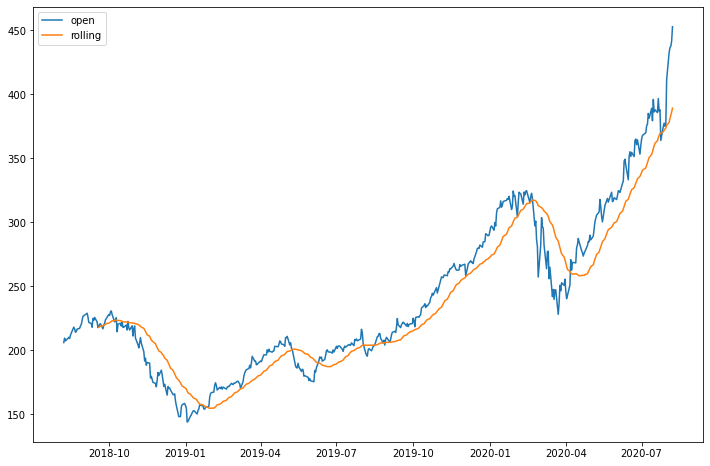

In [26]:
labels = ['open', 'rolling']
plt.figure(figsize=(12,8))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())
plt.legend(labels = labels)
plt.show()

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [27]:
#here I have differenced by 1 time period, int=1 is default
df.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,3.479996,1.970001,2.679993,1.630005,1.583756,967100.0
2018-08-10,-2.169998,-0.679993,-0.529999,-1.350006,-0.604554,1118600.0
2018-08-13,1.949997,1.849991,1.029999,1.339996,1.306550,1279700.0
2018-08-14,0.850006,-0.389999,0.559998,0.880005,0.858108,-5142900.0


In [29]:
#difference over two days
df.diff(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-10,1.309998,1.290008,2.149994,0.279999,0.979202,2085700.0
2018-08-13,-0.220001,1.169998,0.500000,-0.010010,0.701996,2398300.0
2018-08-14,2.800003,1.459992,1.589997,2.220001,2.164658,-3863200.0
...,...,...,...,...,...,...
2020-08-03,56.049988,61.359986,56.500000,50.989990,50.898224,37505300.0
2020-08-04,24.989990,17.500000,30.250000,13.619995,13.595490,-50316300.0
2020-08-05,4.710022,-4.979981,4.019989,4.500000,4.491883,-46539800.0


In [30]:
#difference of the difference: rate of change
df.diff().diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-10,-5.649994,-2.649994,-3.209992,-2.980011,-2.188310,151500.0
2018-08-13,4.119995,2.529984,1.559998,2.690002,1.911104,161100.0
2018-08-14,-1.099991,-2.239990,-0.470001,-0.459991,-0.448442,-6422600.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


In [32]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,0.016889,0.009480,0.013104,0.007865,0.007865,0.042934
2018-08-10,-0.010357,-0.003241,-0.002558,-0.006463,-0.002979,0.047615
2018-08-13,0.009404,0.008847,0.004984,0.006457,0.006457,0.051997
2018-08-14,0.004061,-0.001849,0.002696,0.004213,0.004213,-0.198637


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

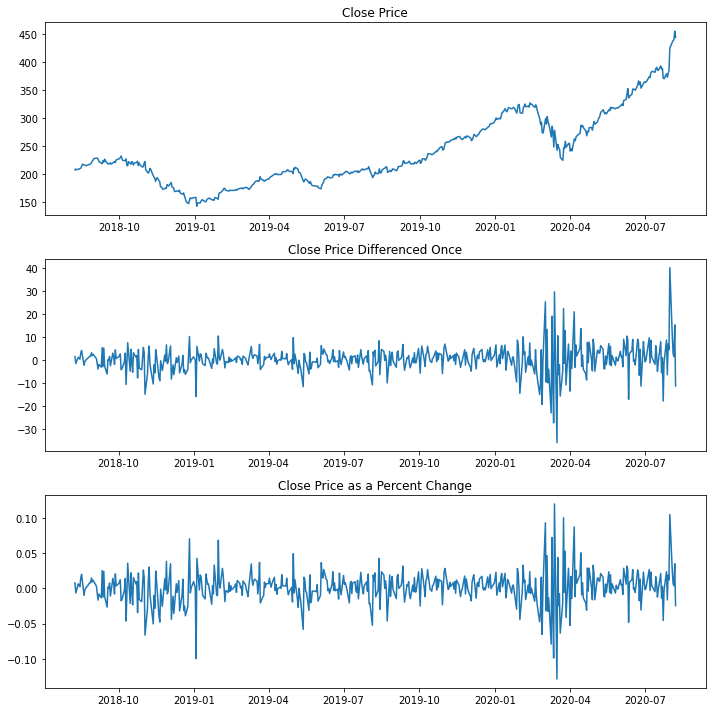

In [34]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
ax[0].plot(df['Close'])
ax[1].plot(df['Close'].diff())
ax[2].plot(df['Close'].pct_change())
ax[0].set_title('Close Price')
ax[1].set_title('Close Price Differenced Once')
ax[2].set_title('Close Price as a Percent Change')
f.tight_layout();

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [35]:
df.shift()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,206.050003,207.809998,204.520004,207.250000,201.371887,22525500.0
2018-08-10,209.529999,209.779999,207.199997,208.880005,202.955643,23492600.0
2018-08-13,207.360001,209.100006,206.669998,207.529999,202.351089,24611200.0
2018-08-14,209.309998,210.949997,207.699997,208.869995,203.657639,25890900.0
...,...,...,...,...,...,...
2020-08-03,411.540009,425.660004,403.299988,425.040009,424.275024,93584200.0
2020-08-04,432.799988,446.549988,431.570007,435.750000,434.965759,77037800.0
2020-08-05,436.529999,443.160004,433.549988,438.660004,437.870514,43267900.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [36]:
pd.concat([
    df[['Open']],
    df[['Close']].shift().rename(columns={'Close' : 'Yes_Close'}),
    df[['Close']]
], axis=1).dropna()

,Open,Yes_Close,Close
Date,,,
2018-08-09,209.529999,207.250000,208.880005
2018-08-10,207.360001,208.880005,207.529999
2018-08-13,209.309998,207.529999,208.869995
2018-08-14,210.160004,208.869995,209.750000
2018-08-15,209.220001,209.750000,210.240005
...,...,...,...
2020-08-03,432.799988,425.040009,435.750000
2020-08-04,436.529999,435.750000,438.660004
2020-08-05,437.510010,438.660004,440.250000


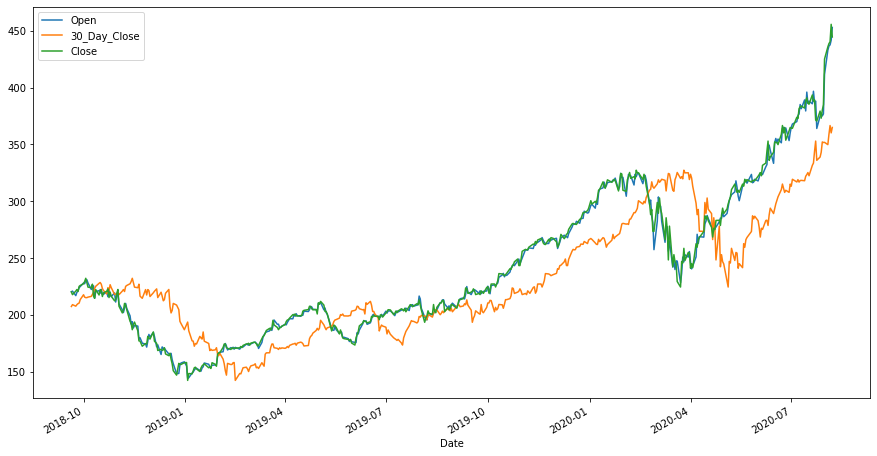

In [37]:
pd.concat([
    df[['Open']],
    df[['Close']].shift(30).rename(columns={'Close' : '30_Day_Close'}),
    df[['Close']]
], axis=1).dropna().plot(figsize=(15,8));

In [38]:
df2 = pd.concat([
    df[['Open']],
    df[['Open','Close']].shift().rename(columns={'Close' : 'Yes_Close', 'Open' : 'Yes_Open'}),
    df[['Open', 'Close']].shift(2).rename(columns={'Close' : '2_Close', 'Open' : '2_Open'}),
    df[['Open', 'Close']].shift(7).rename(columns={'Close' : 'W_Close', 'Open' : 'W_Open'}),
    df[['Close']]
], axis=1).dropna()
df2.head()

,Open,Yes_Open,Yes_Close,2_Open,2_Close,W_Open,W_Close,Close
Date,,,,,,,,
2018-08-17,213.440002,211.750000,213.320007,209.220001,210.240005,206.050003,207.250000,217.580002
2018-08-20,218.100006,213.440002,217.580002,211.750000,213.320007,209.529999,208.880005,215.460007
2018-08-21,216.800003,218.100006,215.460007,213.440002,217.580002,207.360001,207.529999,215.039993
2018-08-22,214.100006,216.800003,215.039993,218.100006,215.460007,209.309998,208.869995,215.050003
2018-08-23,214.649994,214.100006,215.050003,216.800003,215.039993,210.160004,209.750000,215.490005


In [39]:
X = df2.drop(columns='Close')
y = df2['Close']